In [1]:
# libraries used
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics.pairwise import euclidean_distances

In [2]:
data1 = pd.read_csv('dataset1.txt', sep = ' ', header = None) # import data

In [4]:
pairwise_distances = pd.DataFrame(euclidean_distances(data1, data1)) # calculating the euclidean distance between two points

In [6]:
data_pts = len(data1)

# 3A

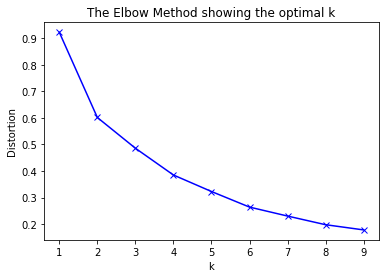

In [46]:
X = data1 # input features

kmeans = KMeans(n_clusters= 2).fit(X) 
y_kmeans = kmeans.predict(X) # labels for the input

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
# plotting to find the elbow 
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


    It seems best K-values is: 2 from graph

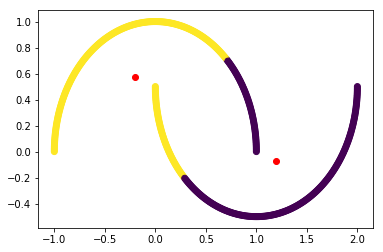

In [44]:
kmeans = KMeans(n_clusters= 2).fit(X) 
y_kmeans = kmeans.predict(X) # labels for the input


plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c= y_kmeans ) 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', alpha= 1) # for plotting the center of the found clusters

## Observation:

     -- In the above plot, we have plotted the points and colored the points according to the labels predicted by the K-Means Algorithm. We have marked the cluster centers with red color. 

     -- It is clear that the clusters are formed around the centers. And this is expected since K-Means clustering works by classifying the points using a distance measure.

     -- Since the ground truth is not available we cannot comment on the nature of the classification. But by plotting the points on 2D, we see the points are forming two semi-circles, and could be the case that the the two semi-circles are two different clusters. So,with this assumption we may conclude that the actual nature of the points is not reflected by the PCA algorithm.

# 3B

[1 2]


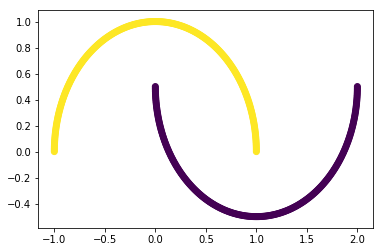

In [12]:
label = [-1]*data_pts # all points are initialized to cluster -1(it means cluster not assigned). Noise is labelled as cluster 0. 
visited = [0]*data_pts # flag to mark if the node is visited.

min_pts = 20 # minimum neighbors required to be a core point
eps = 0.16 # The maximum distance between two sample points for them to be considered as in the same neighborhood.
cid = 0

for i in range(data_pts):
    if visited[i] == 0:
        visited[i] = 1 # mark visited
        friends = pairwise_distances[pairwise_distances[i] <  eps].index.tolist() # find neighbors
        if len(friends) -1 >= eps: # see if current point is a core point.
            cid += 1
            label[i] = cid
            for friend in friends:
                if friend != i: 
                    if visited[friend] == 0:
                        visited[friend] = 1
                        mutual_friends = pairwise_distances[pairwise_distances[friend] <  eps].index.tolist() 
                        if len(mutual_friends) -1 >= eps: # check if the neighbor is a core point
                            friends.extend(mutual_friends) # adding the neighbors of the core point to same cluster.
                        if label[friend] == -1:
                            label[friend] = cid
        else:
            label[i] = 0 # classification for noise 
print(np.unique(label)) # ID's of all clusters identified
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c= label )

## Observation:

     -- In the above plot, we have plotted the points and colored the points according to the labels predicted by the DBSCAN Algorithm. 

     -- Since clustering is done by considering the distance between two points and using the fact that 'n' number of minimum samples is  required to  make it a core point. We expect the points situated closer to belong to the same cluster. 

     -- From graph we see that the points closer are grouped to a same cluster. And we do not observe any noise points from the graph

     -- Since the ground truth is not available we cannot comment on the nature of the classification. But by plotting the points  on 2D we see the points are forming two semi-circles, and could be the case that the the two semi-circles are two different clusters. So,with this assumption we may conclude that the actual nature of the points is captured by DBSCAN algorithm

# 3C

## ploting data to see the distribution of data

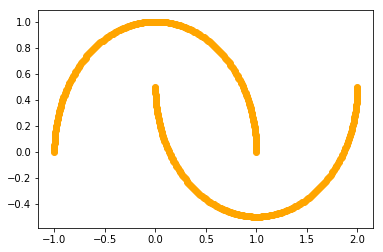

In [14]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c= 'orange' )

## Observation

    By plotting the points  on 2D we see the points are forming two semi-circles. 
    Since ground truth is not available we cannot decide on the best classification algorithm for the given dataset.
    1. K_Means: In the plot the clustered around the centers of the two cluster. This is expected since the K-means works by clustering the set of points in R radius as a cluster.
    2. DBSCAN: In this plot the clusters can be seen as two groups each forming a cluster. 
    
    This happens because the DBSCAN algorithm model uses relative distance between two points and assigns a set of points(Core point) as a representatives of the cluster and does not consider a single global representative of a cluster unlike the K-Means. The set of representative points for a cluster in DBSCAN is set by considering the neighboring points in a fixed radius from the point. And also the core points are actual points from the dataset. Whereas in DBSCAN, the cluster representative point be outside the dataset.


# 3D

In [30]:
data2 = pd.read_csv('dataset2.txt', sep = ' ', header = None)
pairwise_distances = pd.DataFrame(euclidean_distances(data2, data2))
data_pts = len(data2)

## K Means

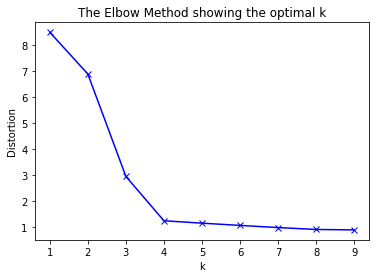

In [47]:
X = data2 # input features

kmeans = KMeans(n_clusters= 2).fit(X) 
y_kmeans = kmeans.predict(X) # labels for the input

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
# plotting to find the elbow 
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

    best value of k seems to be 3 or 4.

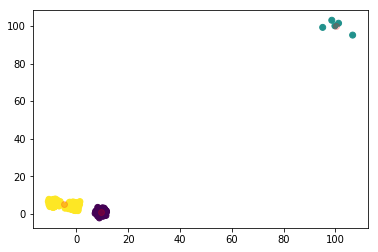

In [49]:
kmeans = KMeans(n_clusters= 3).fit(X) 
y_kmeans = kmeans.predict(X) # labels for the input

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c= y_kmeans ) 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', alpha= 0.2) # for plotting the center of the found clusters

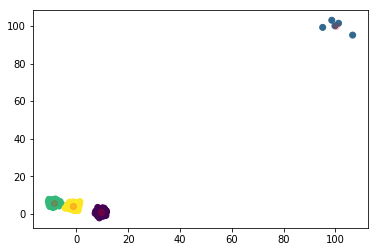

In [50]:
kmeans = KMeans(n_clusters= 4).fit(X) 
y_kmeans = kmeans.predict(X) # labels for the input

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c= y_kmeans ) 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', alpha= 0.2) # for plotting the center of the found clusters

## DBSCAN

[0 1 2]


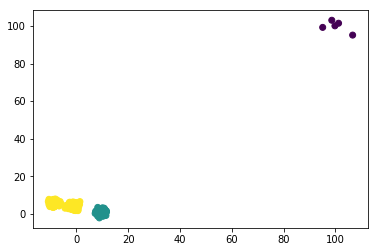

In [62]:
label = [-1]*data_pts # all points are initialized to cluster -1(it means cluster not assigned). Noise is labelled as cluster 0. 
visited = [0]*data_pts # flag to mark if the node is visited.

min_pts = 10 # minimum neighbors required to be a core point
eps = 5 # The maximum distance between two sample points for them to be considered as in the same neighborhood.
cid = 0

for i in range(data_pts):
    if visited[i] == 0:
        visited[i] = 1 # mark visited
        friends = pairwise_distances[pairwise_distances[i] <  eps].index.tolist() # find neighbors
        if len(friends) -1 >= eps: # see if current point is a core point.
            cid += 1
            label[i] = cid
            for friend in friends:
                if friend != i: 
                    if visited[friend] == 0:
                        visited[friend] = 1
                        mutual_friends = pairwise_distances[pairwise_distances[friend] <  eps].index.tolist() 
                        if len(mutual_friends) -1 >= eps: # check if the neighbor is a core point
                            friends.extend(mutual_friends) # adding the neighbors of the core point to same cluster.
                        if label[friend] == -1:
                            label[friend] = cid
        else:
            label[i] = 0 # classification for noise 
print(np.unique(label)) # ID's of all clusters identified
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c= label )

[0 1 2 3]


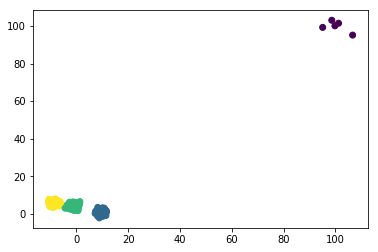

In [28]:
label = [-1]*data_pts # all points are initialized to cluster -1(it means cluster not assigned). Noise is labelled as cluster 0. 
visited = [0]*data_pts # flag to mark if the node is visited.

min_pts = 6 # minimum neighbors required to be a core point
eps = 2 # The maximum distance between two sample points for them to be considered as in the same neighborhood.
cid = 0

for i in range(data_pts):
    if visited[i] == 0:
        visited[i] = 1 # mark visited
        friends = pairwise_distances[pairwise_distances[i] <  eps].index.tolist() # find neighbors
        if len(friends) -1 >= eps: # see if current point is a core point.
            cid += 1
            label[i] = cid
            for friend in friends:
                if friend != i: 
                    if visited[friend] == 0:
                        visited[friend] = 1
                        mutual_friends = pairwise_distances[pairwise_distances[friend] <  eps].index.tolist() 
                        if len(mutual_friends) -1 >= eps: # check if the neighbor is a core point
                            friends.extend(mutual_friends) # adding the neighbors of the core point to same cluster.
                        if label[friend] == -1:
                            label[friend] = cid
        else:
            label[i] = 0 # classification for noise 
print(np.unique(label)) # ID's of all clusters identified
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c= label )

### Observations

### DBSCAN
    Pros:
        This returns the clusters formed and also shows the noise data. 
    Cons:
        Need to optimise the parameters to get results. While elbow method is available for K-Means to find the K- cluster
        value.
     
### K Means
    Pros:
        The number of clusters existing in the dataset can be found by identifying the elbow from the graph using ELBOW 
        method. 
    Cons:
        It doesn't recognize the noise. It also classifies the noise as a cluster